#### 統計検定2級 学習資料

公式サイトの出題範囲表の用語と関連事項をまとめる。

----

## 4. データの活用


### 4.1. 単回帰と予測

ねらい：回帰分析と基礎を理解する。

----

#### 項目（学習しておくべき用語）

|番号|項目|alias|
|:---:|:---:|:---:|
|ch4_1-1|最小二乗法|least squares method (LSM)|
|ch4_1-2|回帰係数|regression coefficient|
|ch4_1-3|平方和の分解|-|
|ch4_1-4|決定係数|coefficient of determination|

----

#### ch4_1-1 最小二乗法
#### ch4_1-2 回帰係数

各観測値とその予測値の差分の二乗和を最小にするような係数(回帰係数)を決定する手法。  

ある得られた変数から、別の知りたい変数との関係式を探るために用いる。

----

上の説明はわかりにくいので順を追って説明する。

これまでの章で扱った相関という方法では2変数を対等に扱い関係性の数値を導出したが、  
**回帰**という方法ではある変数（説明変数）から別の変数（応答変数）を説明したり予測したりする。

説明や予測に用いる変数を**説明変数(explanatory variable)**といい、  
説明変数により説明や予測される変数を**応答変数(response variable)**という。

説明変数と応答変数に対して直線関係を考えるときに、  
この直線のことを**回帰直線(regression line)**という。

回帰直線の傾きと切片を**回帰係数(regression coefficient)**という。

本節では、説明変数が一つだけの**単回帰分析**を扱う。

回帰直線（単回帰）の式：

$$
\begin{align}
 y = α + βx
\end{align}
$$

最も良く応答変数との関係を表す回帰直線を予測する。  
この場合に求まった回帰直線を次のように表すとする。

$$
\begin{align}
 y = \hat{α} + \hat{β}x
\end{align}
$$

(ハット(^)は統計学において予測値や推定値を表す)

In [1]:
# importする
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# 以下のインライン展開のコードを走らせないとmatplotlibのグラフ表示ができない場合がある
%matplotlib inline

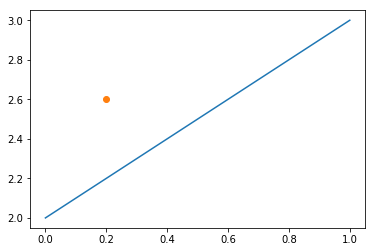

In [2]:
# 数式をグラフで書いてみる 傾き=1,切片=2とする

x = np.linspace(0, 1, 10);
plt.figure(0)
plt.plot(x, x+2)
plt.plot(0.2, 2.6, 'o')
plt.show()

上記の例でいうと、回帰直線と実際に測定された点には誤差があることがわかる。

実際の観測値(yi)と予測値(^yi)の間の差のことを**残差(residual)**という。  
各観測値においての残差を二乗したものに対して全観測値で総和をとった値を**残差平方和**という。  
(二乗することでマイナス、プラスで残差を打ち消し合わないようにする)

残差平方和が大きいほど予測値と観測値の差が大きいことになる。  
この残差平方和を予測の精度の基準として採用し、  
残差平方和が最小となるような回帰係数を求める手法を**最小二乗法(LSM)**という。

残差平方和の式(1.6.3):

$$
\begin{align}
  S(\hat{α},\hat{β}) = \sum ({y_{i} - \hat{y_{i}}})^2 = \sum ({y_{i} - (\hat{α} + \hat{β}x_{i}))}^2
\end{align}
$$

残差平方和は二つのパラメータ^αと^βの二次関数で最小値が存在する。  
二つのパラメータについてそれぞれで残差平方和を偏微分し0に等しいとすると、以下の式が得られる。  
式の過程は./figsのch4-1_1.jpgを参照。

(下に凸グラフなので、=0で最小を求めることになる)

相関係数の式(1.6.6:β、1.6.7:α):

$$
\begin{align}
\begin{split}
  &\hat{β} = \frac{\sum {(y_i - \bar{y})(x_i - \bar{x})}}{\sum{(x_i - \bar{x})^2}}\\
  &=\frac{s_{xy}}{s_{xx}}\\
  &=r_{xy}\frac{\sqrt{s_{yy}}}{\sqrt{s_{xx}}}\\
  &=r_{xy}\frac{s_y}{s_x}\\
  &\hat{α} = \bar{y} - \hat{β}\bar{x}
\end{split}
\end{align}
$$

sxxは変数xの分散、sxyは変数xとyの共分散。rxyは相関係数、sxは標準偏差。

In [3]:
df = pd.read_csv('./ch3-1_suumo3.csv')
df.head(5)

,Unnamed: 0,築年数,賃料,占有面積
0,0,15.0,8.5,20.14
1,1,19.0,7.2,20.87
2,2,15.0,12.9,28.55
3,3,19.0,7.8,20.92
4,4,24.0,5.9,18.00


In [4]:
# scikit-learnを使ってみる
from sklearn import linear_model
clf = linear_model.LinearRegression()

X = df.loc[:, ['占有面積']].as_matrix()
Y = df['賃料'].as_matrix()

clf.fit(X,Y)

# ^β
print(clf.coef_)

# ^α
print(clf.intercept_)

[ 0.36288065]
0.528399866386


In [5]:
# 普通に数式から求めてみる
rxy = df.corr().iloc[2,3]
sx = df['占有面積'].std()
sy = df['賃料'].std()

beta = (rxy*sy)/sx
print(beta)

alpha = df['賃料'].std() - (beta*df['占有面積'].std())
print(alpha)

0.362880654709
0.524164528011


最小二乗法から導かれる性質:  
  1. 予測値の平均=観測値の平均
  2. 残差の平均は0
  3. 回帰直線は、点(変数xの平均、変数yの平均)を通る
  4. 予測値と残差の相関係数は0である
  5. 平方和の分解
  6. 決定係数
  
 1~4までは./figs/ch4-1_2.jpgで解く。  


----

#### ch4_1-3 平方和の分解 (変動の分解)

全変動は、実際のデータとデータ全体の平均値との差を表す。  
これは、実際のデータと推測値との差である残差変動と、  
推定値とデータ全体の平均値との差である回帰変動を合わせたものである。 

全変動の平方和 = 回帰変動の平方和（回帰直線で説明できる部分） + 残差平方和  
./figs/ch4-1_3.jpgで分解の証明をする。  

----

総平方和の式(1.6.8):

$$
\begin{align}
\begin{split}
  \sum(y_i - \bar{y})^2 = \sum(y_i - \hat{y})^2 + \sum(\hat{y} - \bar{y})^2\\
\end{split}
\end{align}
$$

$$
\begin{align}
\begin{split}
  S_y(=S_T) = S_e + S_R
\end{split}
\end{align}
$$

----

#### ch4_1-4 決定係数

総平方和中の回帰による平方和が占める割合。  

----

決定係数の式(1.6.9): #参考の書籍はSr/Syとなっているがおそらく間違い

$$
\begin{align}
\begin{split}
  R^2 = \frac{S_E}{S_y}
\end{split}
\end{align}
$$

In [6]:
# 1の確認
df['賃料予測値'] = df['占有面積']*beta + alpha
df['賃料予測値sklearn'] = df['占有面積']*(clf.coef_) + (clf.intercept_)
df.head(5)

,Unnamed: 0,築年数,賃料,占有面積,賃料予測値,賃料予測値sklearn
0,0,15.0,8.5,20.14,7.832581,7.836816
1,1,19.0,7.2,20.87,8.097484,8.101719
2,2,15.0,12.9,28.55,10.884407,10.888643
3,3,19.0,7.8,20.92,8.115628,8.119863
4,4,24.0,5.9,18.00,7.056016,7.060252


In [7]:
# うん、sklearnを使ったほうがいいね！
print(df['賃料'].mean()) #観測値の平均
print(df['賃料予測値'].mean())
print(df['賃料予測値sklearn'].mean()) #予測値の平均

8.99532
8.99108466163
8.99532


In [8]:
# 2の確認
df['残差'] = df['賃料'] - df['賃料予測値sklearn']
df.head(5)

,Unnamed: 0,築年数,賃料,占有面積,賃料予測値,賃料予測値sklearn,残差
0,0,15.0,8.5,20.14,7.832581,7.836816,0.663184
1,1,19.0,7.2,20.87,8.097484,8.101719,-0.901719
2,2,15.0,12.9,28.55,10.884407,10.888643,2.011357
3,3,19.0,7.8,20.92,8.115628,8.119863,-0.319863
4,4,24.0,5.9,18.00,7.056016,7.060252,-1.160252


In [9]:
# まあ0でいっか
df['残差'].mean()

8.5265128291212024e-17

In [10]:
# 0じゃないけど。。ほぼ0ということで。。
df.loc[:,['賃料予測値sklearn','残差']].corr().iloc[0,1]

5.6166006895468577e-16

In [11]:
# 総平方和
df['全変動'] = pow(df['賃料'] - df['賃料'].mean(),2)
st = df['全変動'].sum()
st

3569.8762487999993

In [12]:
# 回帰の平方和
df['回帰変動'] = pow(df['賃料'] - df['賃料予測値sklearn'],2)
sr = df['回帰変動'].sum()
sr

1262.0833828822476

In [13]:
# 残差平方和
df['残差変動'] = pow(df['賃料予測値sklearn'] - df['賃料'].mean(),2)
se = df['残差変動'].sum()
se

2307.7928659177505

In [14]:
# 回帰の平方和+残差平方和
se+sr

3569.8762487999984

In [15]:
# 決定係数
se/st

0.6464629878118342

In [16]:
# sklearnを用いて決定係数を導出してみる
from sklearn.metrics import r2_score
r2_score(df['賃料'], df['賃料予測値sklearn'])  

# 自分で求めた値とだいたい同じになった

0.64646298781183464

### 参考

参考1: 日本統計学会 編. 改訂版 日本統計学会公式認定 統計検定2級対応 統計学基礎. 東京図書, 2015, 272p  
参考2: 日本統計学会."統計検定2級出題範囲表".http://www.toukei-kentei.jp/wp-content/uploads/grade2_hani_170727.pdf 、(参照2018-02-05).


*Revision:001 2018/02/24 init*